# IMPORT LIBRARIES AND DATASETS

In [2]:
# Note that this notebook is leveraging Python 3 MXNet 1.8 Python 3.7 image
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

     |████████████████████████████████| 2.1 MB 20.2 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-65.6.3-py3-none-any.whl (1.2 MB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.4.0
    Uninstalling setuptools-59.4.0:
      Successfully uninstalled setuptools-59.4.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 169.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 153.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 172.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 204.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.2/279.2 kB 179.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
# pip install autogluon autogluon.tabular "mxnet<2.0.0"

In [5]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
insurance_df = pd.read_csv('insurance.csv')

In [8]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
# unique regions
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# PERFORM EXPLORATORY DATA ANALYSIS 

In [10]:
# Explore the first five rows in the DataFrame
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# Explore the last five rows in the DataFrame
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [12]:
# Generate statistical summary
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# Obtain dataset information
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by='region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [16]:
# Group data by 'age' and examine the relationship between 'age' and 'charges'
df_age = insurance_df.groupby(by = 'age').mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


# PERFORM DATA VISUALIZATION

<AxesSubplot:>

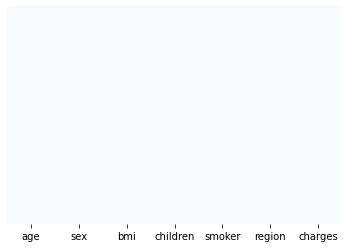

In [17]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [18]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

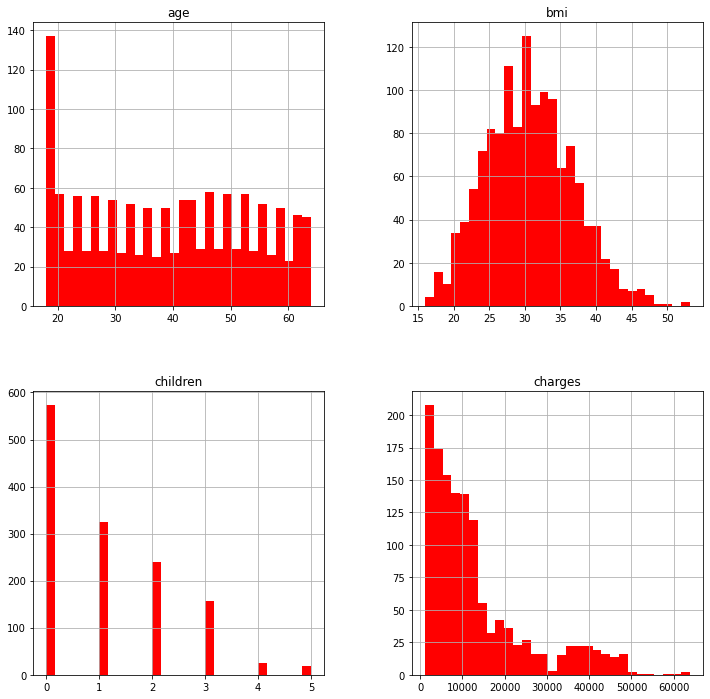

In [19]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (12, 12), color = 'r');


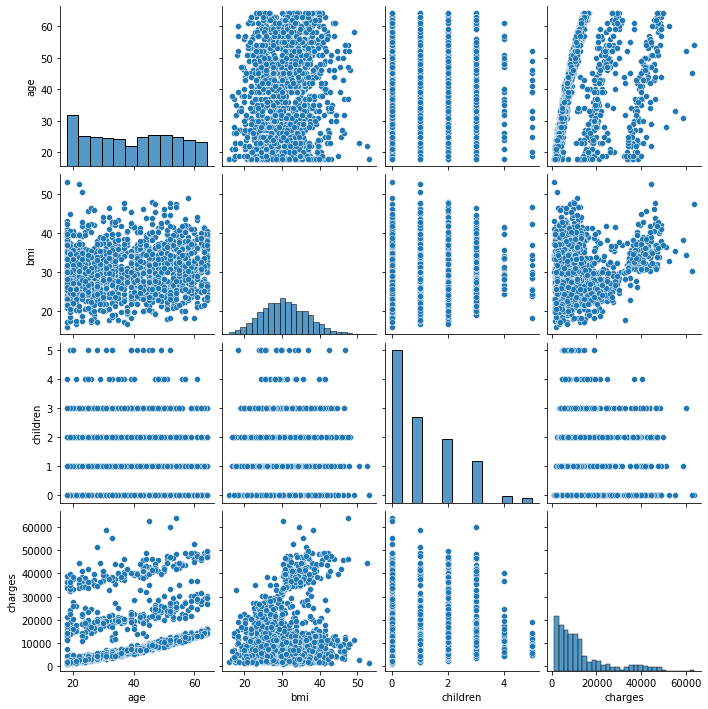

In [20]:
# plot pairplot
sns.pairplot(insurance_df)

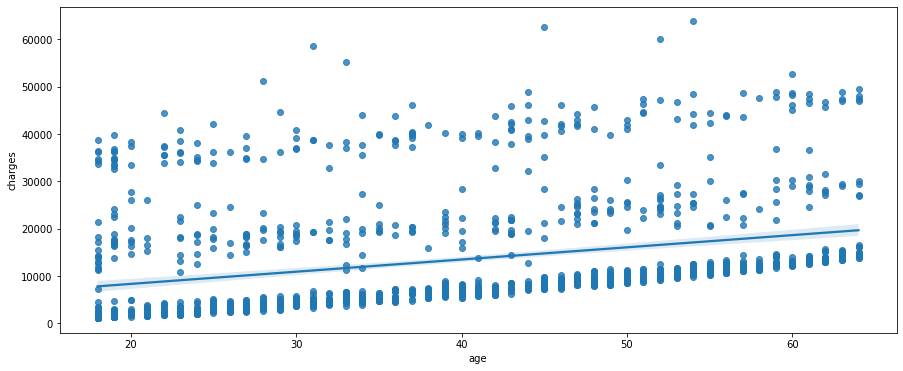

In [21]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

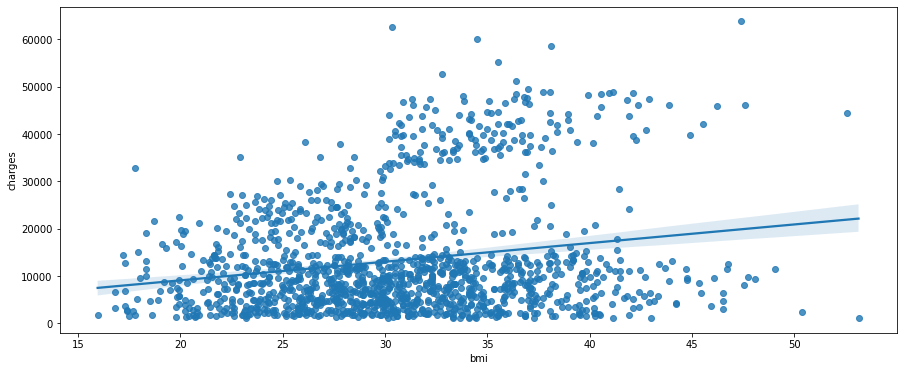

In [22]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()
  

In [23]:
insurance_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

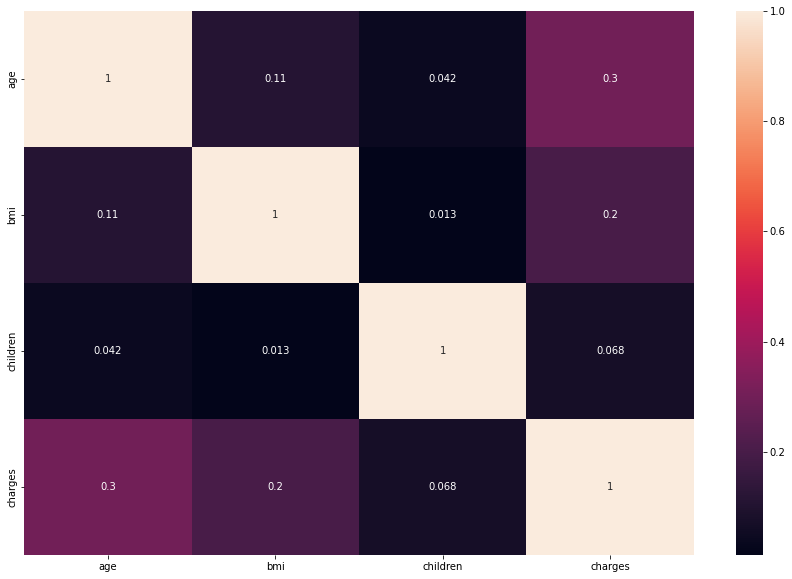

In [24]:
plt.figure(figsize = (15, 10))
sns.heatmap(insurance_df.corr(), annot = True)

# TRAIN MULTIPLE MODELS USING AUTOGLUON

In [25]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(insurance_df, test_size=0.2, random_state=0)

In [26]:
X_train

,age,sex,bmi,children,smoker,region,charges
621,37,male,34.100,4,yes,southwest,40182.24600
194,18,male,34.430,0,no,southeast,1137.46970
240,23,female,36.670,2,yes,northeast,38511.62830
1168,32,male,35.200,2,no,southwest,4670.64000
1192,58,female,32.395,1,no,northeast,13019.16105
...,...,...,...,...,...,...,...
763,27,male,26.030,0,no,northeast,3070.80870
835,42,male,35.970,2,no,southeast,7160.33030
1216,40,male,25.080,0,no,southeast,5415.66120
559,19,male,35.530,0,no,northwest,1646.42970


In [27]:
X_test

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,female,30.495,2,no,northwest,15019.76005
726,41,male,28.405,1,no,northwest,6664.68595
1132,57,male,40.280,0,no,northeast,20709.02034
725,30,female,39.050,3,yes,southeast,40932.42950


In [28]:
# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets 
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20221127_232059/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20221127_232059/"
AutoGluon Version:  0.6.0
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Sep 29 01:01:23 UTC 2022
Train Data Rows:    1070
Train Data Columns: 6
Label Column: charges
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2730.33 MB
	Train Data (Original)  Memory Usage: 0.23 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note

In [29]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.849848       1.180759  174.840017                0.000518           0.108861            3       True         11
1      WeightedEnsemble_L2   0.848542       0.427353   97.837301                0.000508           0.284508            2       True          8
2        LightGBMXT_BAG_L2   0.848513       1.114491  153.485343                0.413031          36.514468            2       True          9
3          CatBoost_BAG_L1   0.846672       0.042817   19.686306                0.042817          19.686306            1       True          5
4        LightGBMXT_BAG_L1   0.840820       0.068217   19.408893                0.068217          19.408893            1       True          3
5          LightGBM_BAG_L2   0.840035       0.767210  138.216688                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -0.07448567993942246,
  'KNeighborsDist_BAG_L1': -0.16102308298670942,
  'LightGBMXT_BAG_L1': 0.8408198040276409,
  'LightGBM_BAG_L1': 0.8396145120831351,
  'CatBoost_BAG_L1': 0.8466715382588097,
  'NeuralNetFastAI_BAG_L1': 0.836500111589254,
  'XGBoost_BAG_L1': 0.8333796770971251,
  'WeightedEnsemble_L2': 0.848541712727081,
  'LightGBMXT_BAG_L2': 0.

# EVALUATE TRAINED MODELS PERFORMANCE

In [30]:
predictor.leaderboard()

                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.849848       1.180759  174.840017                0.000518           0.108861            3       True         11
1      WeightedEnsemble_L2   0.848542       0.427353   97.837301                0.000508           0.284508            2       True          8
2        LightGBMXT_BAG_L2   0.848513       1.114491  153.485343                0.413031          36.514468            2       True          9
3          CatBoost_BAG_L1   0.846672       0.042817   19.686306                0.042817          19.686306            1       True          5
4        LightGBMXT_BAG_L1   0.840820       0.068217   19.408893                0.068217          19.408893            1       True          3
5          LightGBM_BAG_L2   0.840035       0.767210  138.216688                0.065749          21.245813            2       True         10

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.849848,1.180759,174.840017,0.000518,0.108861,3,True,11
1,WeightedEnsemble_L2,0.848542,0.427353,97.837301,0.000508,0.284508,2,True,8
2,LightGBMXT_BAG_L2,0.848513,1.114491,153.485343,0.413031,36.514468,2,True,9
3,CatBoost_BAG_L1,0.846672,0.042817,19.686306,0.042817,19.686306,1,True,5
4,LightGBMXT_BAG_L1,0.840820,0.068217,19.408893,0.068217,19.408893,1,True,3
5,LightGBM_BAG_L2,0.840035,0.767210,138.216688,0.065749,21.245813,2,True,10
6,LightGBM_BAG_L1,0.839615,0.056152,19.360745,0.056152,19.360745,1,True,4
7,NeuralNetFastAI_BAG_L1,0.836500,0.165293,34.924920,0.165293,34.924920,1,True,6
8,XGBoost_BAG_L1,0.833380,0.162582,23.580822,0.162582,23.580822,1,True,7
9,KNeighborsUnif_BAG_L1,-0.074486,0.104628,0.005253,0.104628,0.005253,1,True,1


                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.849848       1.180759  174.840017                0.000518           0.108861            3       True         11
1      WeightedEnsemble_L2   0.848542       0.427353   97.837301                0.000508           0.284508            2       True          8
2        LightGBMXT_BAG_L2   0.848513       1.114491  153.485343                0.413031          36.514468            2       True          9
3          CatBoost_BAG_L1   0.846672       0.042817   19.686306                0.042817          19.686306            1       True          5
4        LightGBMXT_BAG_L1   0.840820       0.068217   19.408893                0.068217          19.408893            1       True          3
5          LightGBM_BAG_L2   0.840035       0.767210  138.216688                0.065749          21.245813            2       True         10

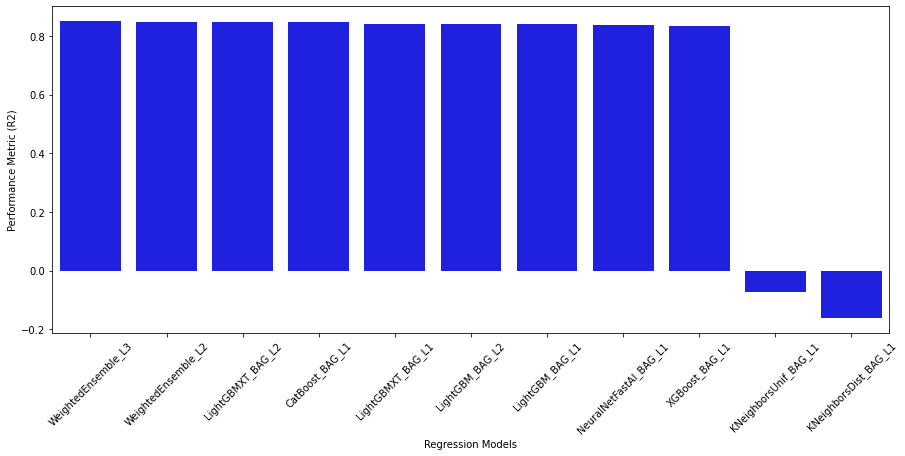

In [31]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);


In [32]:
predictor.evaluate(X_test)

Evaluation: r2 on test data: 0.9040580046362866
Evaluations on test data:
{
    "r2": 0.9040580046362866,
    "root_mean_squared_error": -3907.3323517890385,
    "mean_squared_error": -15267246.107337259,
    "mean_absolute_error": -2391.421087925956,
    "pearsonr": 0.9513052474840604,
    "median_absolute_error": -1556.8824867187498
}


{'r2': 0.9040580046362866,
 'root_mean_squared_error': -3907.3323517890385,
 'mean_squared_error': -15267246.107337259,
 'mean_absolute_error': -2391.421087925956,
 'pearsonr': 0.9513052474840604,
 'median_absolute_error': -1556.8824867187498}

In [33]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [12097.01171875, 10082.615234375, 44649.85546875, 13241.1376953125, 11450.6171875]


In [35]:
X_test

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,female,30.495,2,no,northwest,15019.76005
726,41,male,28.405,1,no,northwest,6664.68595
1132,57,male,40.280,0,no,northeast,20709.02034
725,30,female,39.050,3,yes,southeast,40932.42950


In [36]:
y_test = X_test['charges']
y_test #groundtruth

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

Text(0.5, 0, 'True Values')

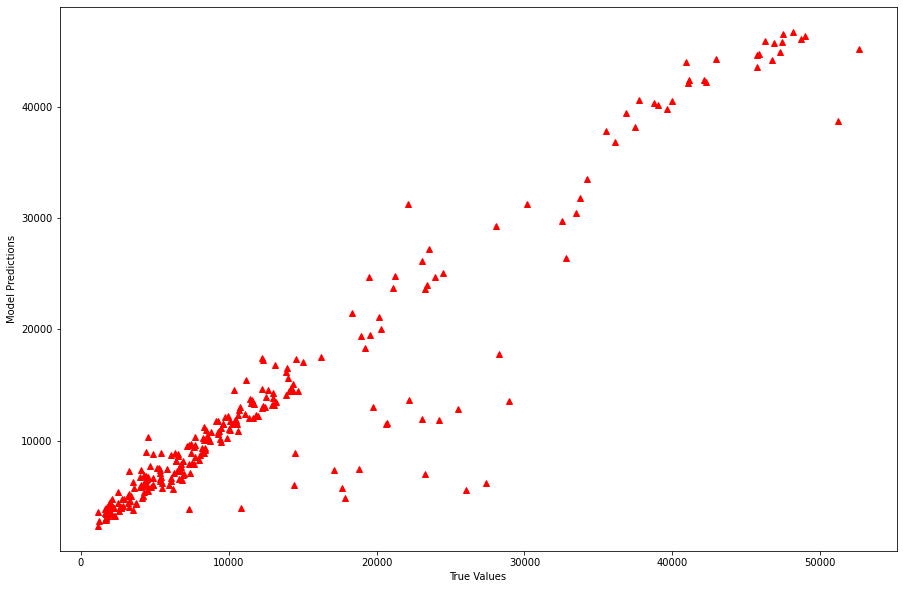

In [37]:
y_predict = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')


In [38]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 3907.332 
MSE = 15267246.107337259 
MAE = 2391.421087925956 
R2 = 0.9040580046362866 
Adjusted R2 = 0.9014749509149559


# Retraining the regressor models using AutoGluon with different presets

No path specified. Models will be saved in: "AutogluonModels/ag-20221127_233723/"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20221127_233723/"
AutoGluon Version:  0.6.0
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Sep 29 01:01:23 UTC 2022
Train Data Rows:    1070
Train Data Columns: 6
Label Column: charges
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2236.43 MB
	Train Data (Original)  Memory Usage: 0.23 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	S

*** Summary of fit() ***
Estimated performance of each model:
                 model    score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -4593.420333       0.040607  9.217250                0.000540           0.343250            2       True          5
1             CatBoost -4606.663123       0.003275  0.685349                0.003275           0.685349            1       True          2
2       NeuralNetTorch -4713.425370       0.012653  6.531696                0.012653           6.531696            1       True          4
3             LightGBM -4763.082342       0.009660  0.372000                0.009660           0.372000            1       True          1
4      NeuralNetFastAI -4776.217440       0.014480  1.284954                0.014480           1.284954            1       True          3
Number of models trained: 5
Types of models trained:
{'TabularNeuralNetTorchModel', 'NNFastAiTabularMode

Evaluation: root_mean_squared_error on test data: -3951.1369030754063
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -3951.1369030754063,
    "mean_squared_error": -15611482.826844312,
    "mean_absolute_error": -2351.4415107148434,
    "r2": 0.9018947619981076,
    "pearsonr": 0.9501257673185706,
    "median_absolute_error": -1426.88345390625
}


{'root_mean_squared_error': -3951.1369030754063,
 'mean_squared_error': -15611482.826844312,
 'mean_absolute_error': -2351.4415107148434,
 'r2': 0.9018947619981076,
 'pearsonr': 0.9501257673185706,
 'median_absolute_error': -1426.88345390625}

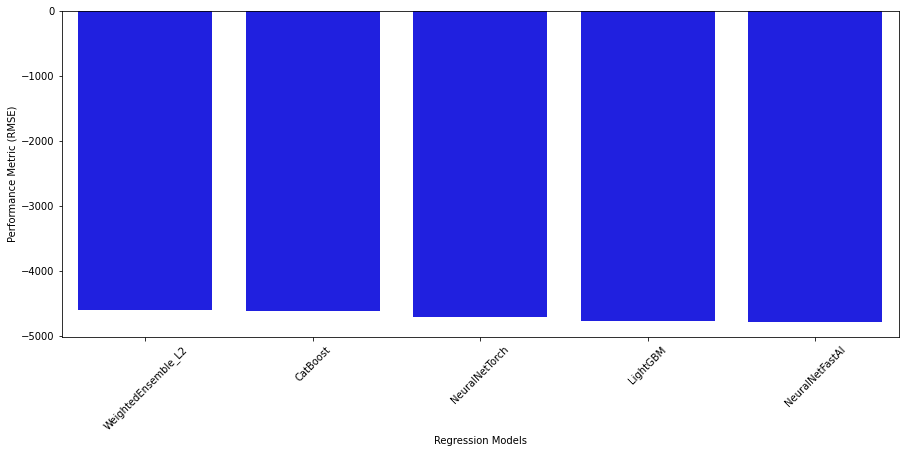

In [39]:
predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'rmse').fit(train_data = X_train, time_limit = 300, presets = "optimize_for_deployment")
predictor.fit_summary()
predictor.leaderboard()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (RMSE)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

predictor.evaluate(X_test)